In [1]:
from Parameters import *

Welcome to JupyROOT 6.24/06


/uscms_data/d3/ahayrape/mamba/envs/anal/lib/python3.9/site-packages/numba/core/cpu.py:97: UserWarning: Numba extension module 'awkward.numba' failed to load due to 'FileNotFoundError([Errno 2] No such file or directory: '/uscms_data/d3/ahayrape/mamba/envs/anal/lib/python3.9/site-packages/numpy-1.23.2.dist-info/METADATA')'.
  numba.core.entrypoints.init_all()


In [2]:
MuonSystem = "DT"
filename = f'./Pickles/Output_TRACKS_50_{MuonSystem}.pickle'
file = open(filename, 'rb')
data = pickle.load(file)
file.close()
datasets = [
    'PhiToPi0Pi0_mPhi1p0_ctau1000',
    'PhiToPi0Pi0_mPhi0p3_ctau300',
    'PhiToPiPlusPiMinus_mPhi0p3_ctau300',
    'PhiToPiPlusPiMinus_mPhi1p0_ctau300',
    'PhiToPiPlusPiMinus_mPhi1p0_ctau1000',
    'background',
]

In [ ]:
warnings.filterwarnings("ignore")
rt.gStyle.SetOptStat(0)
a = 1
variables   = ["matched_track_pt_sum_0p2", "matched_track_pt_sum_0p3", "matched_track_pt_sum_0p4", "matched_track_pt_sum_0p5"]
x_axis_name = ["Sum Track Pt_0p2", "Sum Track Pt_0p3", "Sum Track Pt_0p4", "Sum Track Pt_0p5"]
image_names = ["track_sum_pt_0p2", "track_sum_pt_0p3", "track_sum_pt_0p4", "track_sum_pt_0p5"]
range_from  = [0, 0, 0, 0]
range_to    = [300, 300, 300, 300]
cuts        = {
    "CSC": ["-5 < cls_time < 12.5", "|cls_timeSpread| < 20", "|cls_eta| < 1.9", "cut_based_ID"],
    "DT" : ["muon_veto", "mb1_veto", "rpc_time_cut", "mb1_adjacent"]
}
the_cuts    = cuts[MuonSystem]

bins = 30
hist = list(np.zeros(len(datasets)))
colors = [2,3,4,5,6,1]
for k, the_cut in enumerate(the_cuts):
    for j, variable in enumerate(variables):
        name = f"{the_cut}_{variable}"
        c = rt.TCanvas(name, name, 800, 600)
        l = rt.TLegend(0.75, 0.8, 1, 1)
        img = rt.TImage.Create()
        for i, dset in enumerate(datasets):
            # if i != 0: continue
            var = np.array(data[f"{dset}_vars"][f"{variable} with {the_cut}"])
            print(np.array(data[f"{dset}_vars"][f"{variable} with {the_cut}"]))
            if "pt" in variable:
                var[var == -777] = 0
            hist[i] = rt.TH1D(f"{name}_{i}", f"{name}_{i}", bins, range_from[j],  range_to[j])
            hist[i].SetXTitle(x_axis_name[j])
            weights = np.ones(len(var)) / len(var)
            rtnp.fill_hist(hist[i], var, weights = weights)
            hist[i].SetLineColor(colors[i])
            hist[i].SetLineWidth(2)
            hist[i].Draw("HIST same")
            l.AddEntry(hist[i], dset)
        c.SetLogy()
        l.Draw("same")
        c.Draw()
        img.FromPad(c)
        img.WriteImage(f"./Track_data/{MuonSystem}/{name}.png")
        c.Close()
    print()

<h1>ROC curve</h1>

In [12]:
cuts        = {
    "CSC": "cut_based_ID",
    "DT" : "mb1_adjacent"
}
the_cut     = cuts[MuonSystem]
variable    = "matched_track_pt_sum_0p5"

eff = {}
eff_data = []
for i, dset in enumerate(datasets):
    if dset != "background":
        eff[dset] = []
        var = np.array(data[f"{dset}_vars"][f"{variable} with {the_cut}"])
        for j in range(0, 20):
            eff[dset].append(len(var[var < j+1]) / len(var))
    else:
        var = np.array(data[f"{dset}_vars"][f"{variable} with {the_cut}"])
        for j in range(0, 20):
            eff_data.append(len(var[var < j+1]) / len(var))


Warning in <TCanvas::Constructor>: Deleting canvas with same name: ROC curve


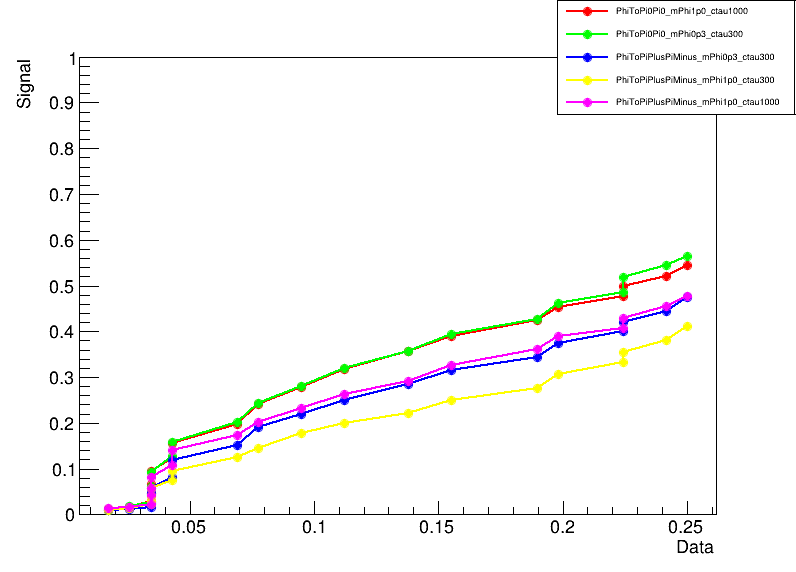

In [13]:
c = rt.TCanvas("ROC curve", "ROC curve", 800, 600)
l = rt.TLegend(0.7, 0.8, 1, 1)
colors = [2,3,4,5,6,1]
gr = []
datasets = [
    'PhiToPi0Pi0_mPhi1p0_ctau1000',
    'PhiToPi0Pi0_mPhi0p3_ctau300',
    'PhiToPiPlusPiMinus_mPhi0p3_ctau300',
    'PhiToPiPlusPiMinus_mPhi1p0_ctau300',
    'PhiToPiPlusPiMinus_mPhi1p0_ctau1000',
    'background',
]
mg = rt.TMultiGraph()

for i, dset in enumerate(datasets):
    if dset != "background":
        e  = eff[dset]
        gr.append(rt.TGraph(len(eff_data), np.array(eff_data), np.array(eff[dset])))
        # gr[i].GetXaxis().SetRangeUser(0, 1)
        gr[i].SetLineColor(colors[i])
        gr[i].SetLineWidth(2)
        gr[i].SetMarkerColor(colors[i])
        gr[i].SetMarkerStyle(8)
        mg.Add(gr[i])
        l.AddEntry(gr[i], dset)
        # if i == 0:
        #     gr[i].Draw("ALP")
        # else:
        #     gr[i].Draw("ALP same")
mg.GetXaxis().SetTitle("Data")
mg.GetYaxis().SetTitle("Signal")
mg.GetYaxis().SetRangeUser(0, 1)
mg.Draw("APL")
#c.SetLogy()
#c.SetLogx()
l.Draw("same")
c.Draw()    